In [82]:
import pandas as pd
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]

Let us import the csv file

In [83]:
BF_sales_dataframe = pd.read_csv("/home/pri/Downloads/BlackFriday.csv",index_col=0)

In [84]:
rawdata = BF_sales_dataframe.reset_index('User_ID')
rawdata.index.name='leftInd'
#print(rawdata)

In [85]:
BF_sales_dataframe.head(100)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686


Let us explore Product_Category_1 , Product_Category_2, Product_Category_3 to understand its definition

In [86]:
BF_sales_PC1_Values = BF_sales_dataframe['Product_Category_1'].unique()
BF_sales_PC1_Values.sort()
print(BF_sales_PC1_Values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [87]:
BF_sales_PC2_Values = BF_sales_dataframe['Product_Category_2'].unique()
BF_sales_PC2_Values.sort()
print(BF_sales_PC2_Values)


[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  nan]


In [88]:
BF_sales_PC3_Values = BF_sales_dataframe['Product_Category_3'].unique()
BF_sales_PC3_Values.sort()
print(BF_sales_PC3_Values)

[  3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  nan]


From the data it is understood that Product_Category_1 is a broad catergory which includes every category
Product_Category_2 is slightly arrow and does not include product category 1
Product_Category_3 does not include product catergory 1 and 2

Let us try and answer some questions now

In [89]:
# Top 5 product interms of sales

BF_Top5_sold_product = BF_sales_dataframe.groupby('Product_ID').size().reset_index(name ='counts')
BF_Top5_sold_product = BF_Top5_sold_product.sort_values(by = 'counts' , ascending=False)
BF_Top5_sold_product.head(5)

,Product_ID,counts
2534,P00265242,1858
1014,P00110742,1591
249,P00025442,1586
1028,P00112142,1539
565,P00057642,1430


In [90]:
# Top 5 product by gender interms of sales
# Top 5 products bought by Men

BF_Top5_sold_product = BF_sales_dataframe.groupby(['Product_ID','Gender']).size().reset_index(name ='counts')
BF_Top5_sold_product_M = BF_Top5_sold_product.loc[BF_Top5_sold_product['Gender'] == 'M'].sort_values(by = 'counts' , ascending=False)
BF_Top5_sold_product_M.head(5)

,Product_ID,Gender,counts
4867,P00265242,M,1353
484,P00025442,M,1245
1927,P00110742,M,1234
1955,P00112142,M,1207
1100,P00057642,M,1174


In [91]:
# Top 5 products bought by Women

BF_Top5_sold_product = BF_sales_dataframe.groupby(['Product_ID','Gender']).size().reset_index(name ='counts')
BF_Top5_sold_product_M = BF_Top5_sold_product.loc[BF_Top5_sold_product['Gender'] == 'F'].sort_values(by = 'counts' , ascending=False)
BF_Top5_sold_product_M.head(5)

,Product_ID,Gender,counts
4866,P00265242,F,505
4011,P00220442,F,427
1105,P00058042,F,378
4687,P00255842,F,366
664,P00034742,F,358


P00265242 and P00220442 was clearly a win with both and men

Let us find the  costliest product sold and how many of them?


In [92]:
BF_sales_dataframe_cost = BF_sales_dataframe.sort_values(by = 'Purchase', ascending=False)
BF_sales_dataframe_cost[['Product_ID','Purchase']].head(5)

,Product_ID,Purchase
User_ID,,
1001474,P00052842,23961
1002272,P00052842,23961
1003160,P00052842,23961
1005848,P00119342,23960
1005596,P00117642,23960


In [93]:
BF_return_user_product = BF_sales_dataframe.groupby('User_ID').size().reset_index(name ='counts')
#print(BF_return_user_product)

In [94]:
# Sort the users by the number of products purchased
BF_return_user_product_sorted = BF_return_user_product.sort_values(by = 'counts', ascending=False)
#print(BF_return_user_product_sorted.head(10))
#print(BF_return_user_product_sorted)

In [95]:
#we assume users who bought more than 100 products are return users
BF_return_user_product_sorted_100 = BF_return_user_product_sorted.loc[BF_return_user_product_sorted['counts'] > 100]

# we assume users who bought less than 15 products are new users.5 is the least number of products a user bought 
#in this dataset

BF_new_user = BF_return_user_product_sorted.loc[BF_return_user_product_sorted['counts'] < 15]


In [96]:
# create a dataset of returning users

top_100_returning_users = rawdata.loc[rawdata['User_ID'].isin(BF_return_user_product_sorted_100['User_ID'])]
#top_100_returning_users[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status']]
top_100_unique_returning_users=top_100_returning_users[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']].drop_duplicates()

# create a dataset of new users

new_users = rawdata.loc[rawdata['User_ID'].isin(BF_new_user['User_ID'])]
#top_100_returning_users[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status']]
unique_new_users=new_users[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']].drop_duplicates()
#print(unique_new_users)

In [97]:
# prepare dataset to plot occupation of returning users

returning_users_Occupation= top_100_unique_returning_users.groupby('Occupation').size().reset_index(name='count')
returning_users_Occupation=returning_users_Occupation.sort_values(by = 'count' , ascending=False)
returning_users_Occupation['Occupation'] = returning_users_Occupation.Occupation.astype(str)
#returning_users_Occupation['count'] = returning_users_Occupation.count.astype(str)
#print(returning_users_Occupation)


#Prepare dataset to plot occupation of new users

new_users_Occupation= unique_new_users.groupby('Occupation').size().reset_index(name='count')
new_users_Occupation=new_users_Occupation.sort_values(by = 'count' , ascending=False)
new_users_Occupation['Occupation'] = new_users_Occupation.Occupation.astype(str)

In [98]:
#Prepare dataset to plot Gender of returning users
returning_users_Gender= top_100_unique_returning_users.groupby('Gender').size().reset_index(name='count')
returning_users_Gender=returning_users_Gender.sort_values(by = 'count' , ascending=False)

#Prepare dataset to plot Gender of new users

new_users_Gender= unique_new_users.groupby('Gender').size().reset_index(name='count')
new_users_Gender=new_users_Gender.sort_values(by = 'count' , ascending=False)


In [99]:
#Prepare dataset to plot Age of returning users
returning_users_Age= top_100_unique_returning_users.groupby('Age').size().reset_index(name='count')
returning_users_Age=returning_users_Age.sort_values(by = 'count' , ascending=False)
#print(returning_users_Age)

#Prepare dataset to plot Age of new users

new_users_Age= unique_new_users.groupby('Age').size().reset_index(name='count')
new_users_Age=new_users_Age.sort_values(by = 'count' , ascending=False)

In [100]:
#Prepare dataset to plot city category of returning users

returning_users_City_Category= top_100_unique_returning_users.groupby('City_Category').size().reset_index(name='count')
returning_users_City_Category=returning_users_City_Category.sort_values(by = 'count' , ascending=False)
#print(returning_users_City_Category)

#Prepare dataset to plot city category of new users

new_users_City_Category= unique_new_users.groupby('City_Category').size().reset_index(name='count')
new_users_City_Category= new_users_City_Category.sort_values(by = 'count' , ascending=False)
#print(new_users_City_Category)

In [101]:
#Prepare dataset to plot stay in current city of returning users


returning_users_City_Stay_In_Current_City_Years= top_100_unique_returning_users.groupby('Stay_In_Current_City_Years').size().reset_index(name='count')
returning_users_City_Stay_In_Current_City_Years=returning_users_City_Stay_In_Current_City_Years.sort_values(by = 'count' , ascending=False)
#print(returning_users_City_Stay_In_Current_City_Years)

#Prepare dataset to plot stay in current city of new users

new_users_City_Stay_In_Current_City_Years= unique_new_users.groupby('Stay_In_Current_City_Years').size().reset_index(name='count')
new_users_City_Stay_In_Current_City_Years= new_users_City_Stay_In_Current_City_Years.sort_values(by = 'count' , ascending=False)
#print(new_users_City_Stay_In_Current_City_Years)

In [102]:

#Prepare dataset to plot Marital status of returning users

returning_users_Marital_Status= top_100_unique_returning_users.groupby('Marital_Status').size().reset_index(name='count')
returning_users_Marital_Status=returning_users_Marital_Status.sort_values(by = 'count' , ascending=False)
#print(returning_users_Marital_Status)

#Prepare dataset to plot Marital status of new users

new_users_Marital_Status= unique_new_users.groupby('Marital_Status').size().reset_index(name='count')
new_users_Marital_Status=new_users_Marital_Status.sort_values(by = 'count' , ascending=False)
#print(new_users_Marital_Status)

In [103]:
#Prepare dataset to plot Marital status of returning users
returning_users_Product_Category_1= top_100_unique_returning_users.groupby('Product_Category_1').size().reset_index(name='count')
returning_users_Product_Category_1=returning_users_Product_Category_1.sort_values(by = 'count' , ascending=False)
#print(returning_users_Product_Category_1)

#Prepare dataset to plot Marital status of new users

new_users_Product_Category_1= unique_new_users.groupby('Product_Category_1').size().reset_index(name='count')
new_users_Product_Category_1=new_users_Product_Category_1.sort_values(by = 'count' , ascending=False)
#print(new_users_Product_Category_1)

In [104]:
#Prepare dataset to plot Product_Category_2 of returning users
returning_users_Product_Category_2= top_100_unique_returning_users.groupby('Product_Category_2').size().reset_index(name='count')
returning_users_Product_Category_2=returning_users_Product_Category_2.sort_values(by = 'count' , ascending=False)
#print(returning_users_Product_Category_2)

#Prepare dataset to plot Product_Category_2 of new users

new_users_Product_Category_2= unique_new_users.groupby('Product_Category_2').size().reset_index(name='count')
new_users_Product_Category_2=new_users_Product_Category_2.sort_values(by = 'count' , ascending=False)
#print(new_users_Product_Category_2)

In [105]:
#Prepare dataset to plot Product_Category_3 of new users
returning_users_Product_Category_3= top_100_unique_returning_users.groupby('Product_Category_3').size().reset_index(name='count')
returning_users_Product_Category_3=returning_users_Product_Category_3.sort_values(by = 'count' , ascending=False)
print(returning_users_Product_Category_3)

#Prepare dataset to plot Product_Category_3 of new users

new_users_Product_Category_3= unique_new_users.groupby('Product_Category_3').size().reset_index(name='count')
new_users_Product_Category_3=new_users_Product_Category_3.sort_values(by = 'count' , ascending=False)
print(new_users_Product_Category_3)

    Product_Category_3  count
12                16.0  12870
11                15.0   8352
10                14.0   7653
13                17.0   6219
4                  8.0   5260
5                  9.0   4782
8                 12.0   3742
2                  5.0   3675
9                 13.0   3157
14                18.0   2777
3                  6.0   1908
1                  4.0    969
6                 10.0    960
7                 11.0    930
0                  3.0    375
    Product_Category_3  count
12                16.0    342
13                17.0    242
4                  8.0    211
11                15.0    211
2                  5.0    184
10                14.0    164
5                  9.0    135
8                 12.0     63
9                 13.0     58
14                18.0     35
3                  6.0     21
6                 10.0     21
1                  4.0     11
7                 11.0     11
0                  3.0      2


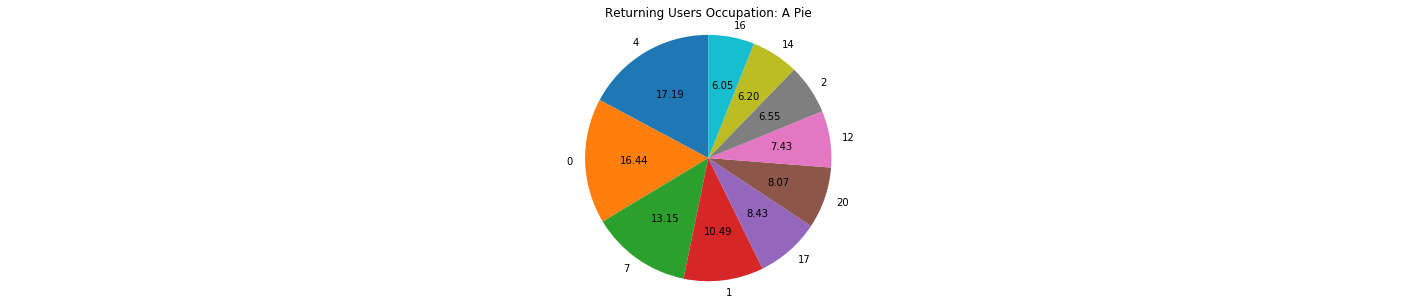

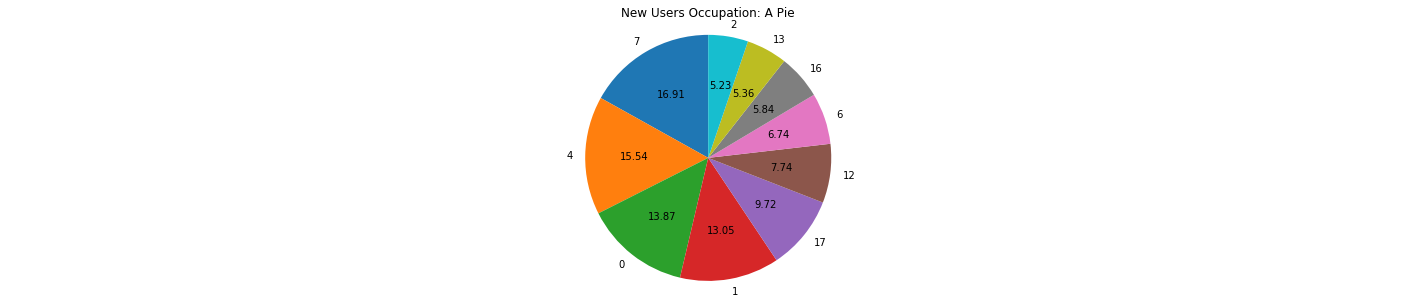

In [106]:
#let us plot the Ocuupation of returning users
returning_users_Occupation = returning_users_Occupation.head(10)
#plt.bar(returning_users_Occupation['Occupation'],returning_users_Occupation['count'])
#plt.title('Occupation of top 100 returning users')
#plt.xlabel('Occupation')
#plt.ylabel('Count')
#ig_size[0]= 12
#fig_size[1]=4
#plt.rcParams["figure.figsize"] = fig_size
#for i, v in enumerate(returning_users_Occupation['count']):
   # plt.text(v + 3, i + 0.25, str(v), color='blue', fontweight='bold')
#plt.show()
pieLabels=returning_users_Occupation['Occupation']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Occupation['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Occupation: A Pie")
plt.show()
#print(returning_users_Occupation)

#let us plot the Occupation of new users
new_users_Occupation = new_users_Occupation.head(10)
pieLabels=new_users_Occupation['Occupation']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_Occupation['count'],
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Occupation: A Pie")
plt.show()

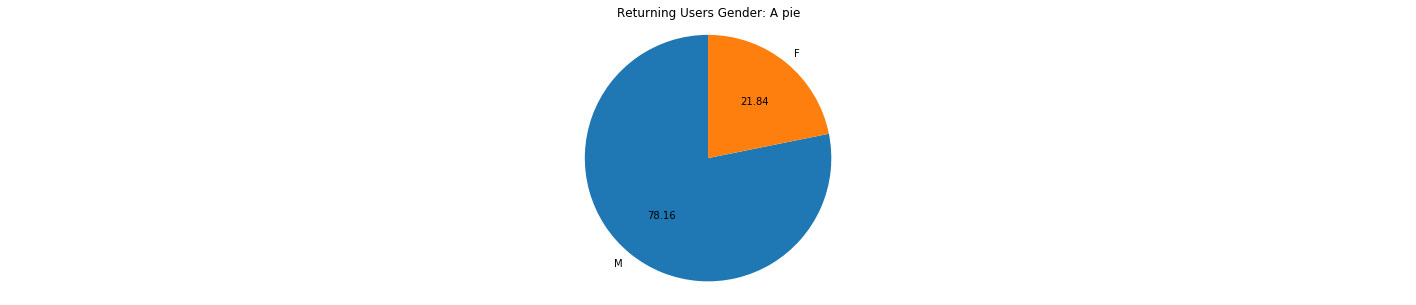

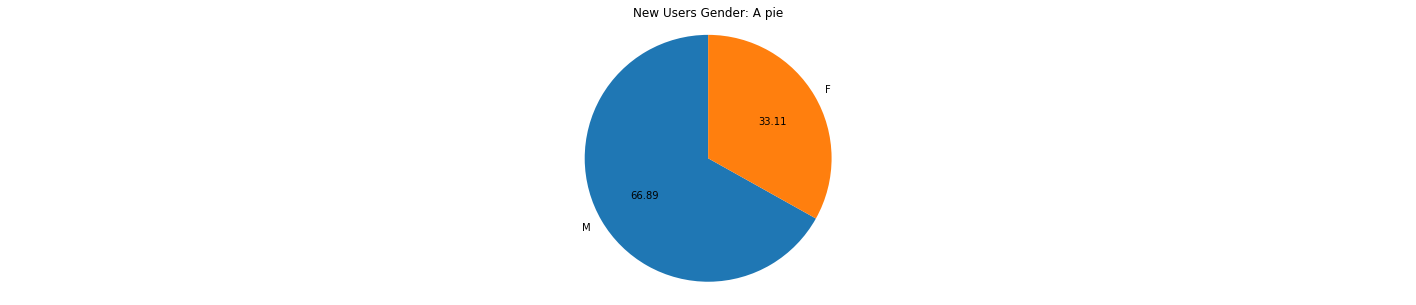

In [107]:
#let us plot the gender of  returning users
pieLabels=returning_users_Gender['Gender']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Gender['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Gender: A pie")

plt.show()

#let us plot the gender of new users
pieLabels=new_users_Gender['Gender']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_Gender['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Gender: A pie")

plt.show()

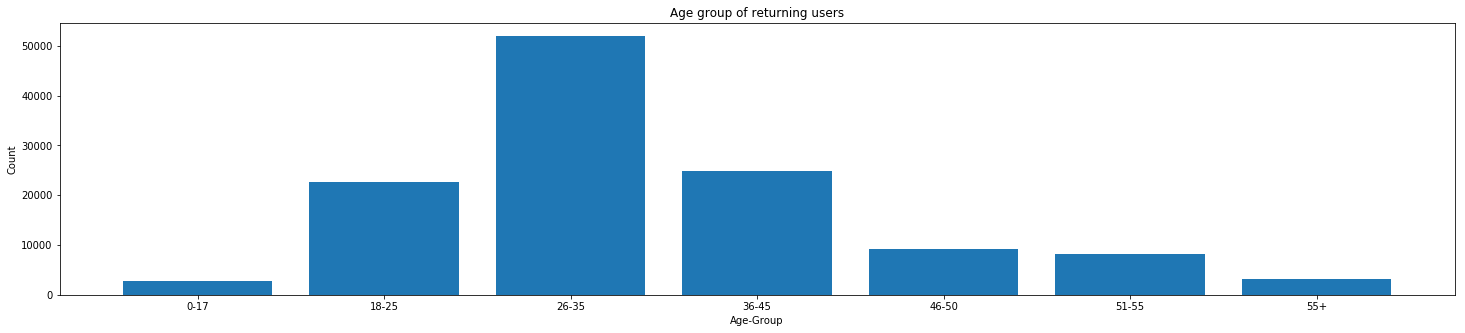

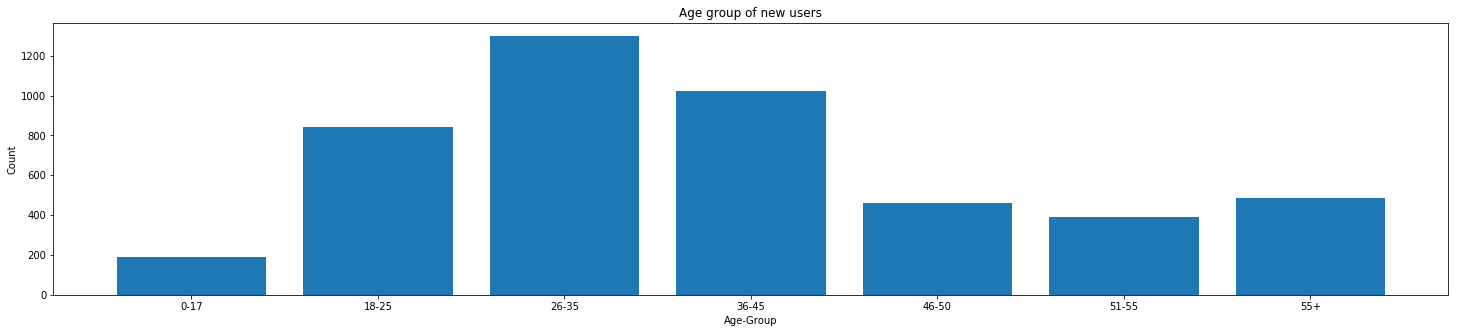

In [108]:
#let us plot the age of returning users
plt.bar(returning_users_Age['Age'],returning_users_Age['count'])
plt.title('Age group of returning users')
plt.xlabel('Age-Group')
plt.ylabel('Count')
fig_size[0]= 25
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
#for i, v in enumerate(returning_users_Age['count']):
   # plt.text(v + 3, i + 0.25, str(v), color='blue', fontweight='bold')
plt.show()
#print(returning_users_Age)
#let us plot the age of new users
plt.bar(new_users_Age['Age'],new_users_Age['count'])
plt.title('Age group of new users')
plt.xlabel('Age-Group')
plt.ylabel('Count')
fig_size[0]= 25
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
#for i, v in enumerate(returning_users_Age['count']):
   # plt.text(v + 3, i + 0.25, str(v), color='blue', fontweight='bold')
plt.show()
#print(returning_users_Age)

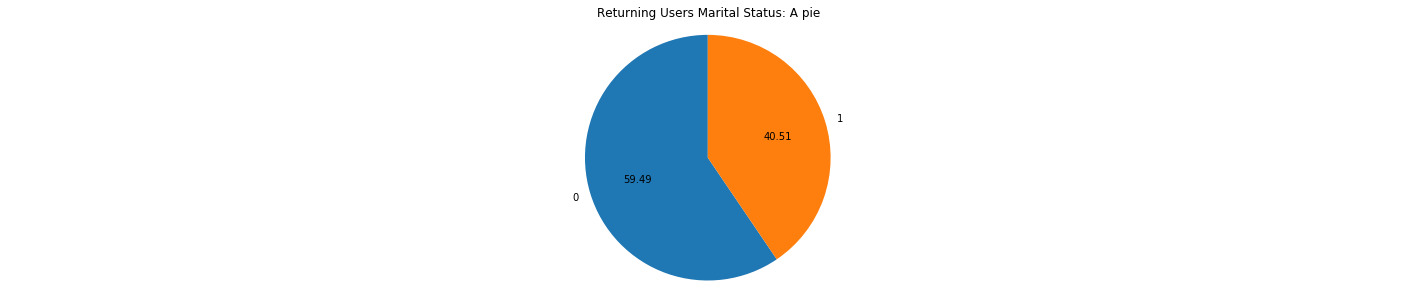

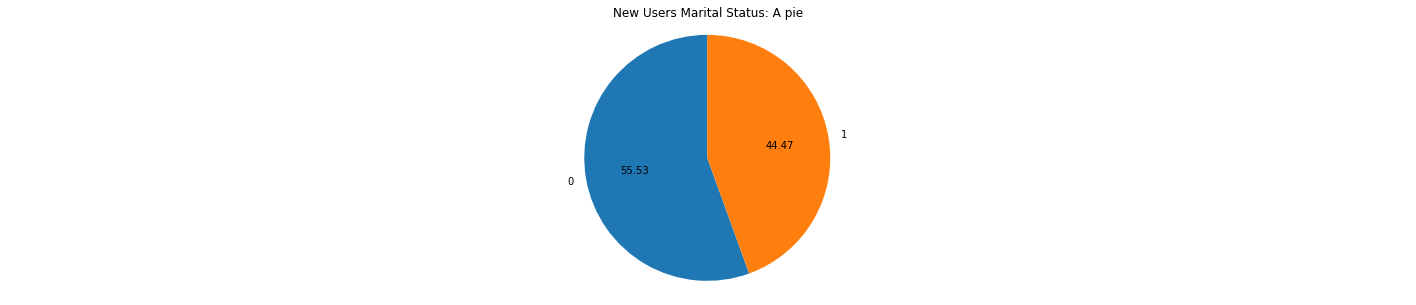

In [109]:

#let us plot the gender of  returning users
pieLabels=returning_users_Marital_Status['Marital_Status']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Marital_Status['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Marital Status: A pie")

plt.show()

#let us plot the gender of new users
pieLabels=new_users_Marital_Status['Marital_Status']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_Marital_Status['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Marital Status: A pie")

plt.show()

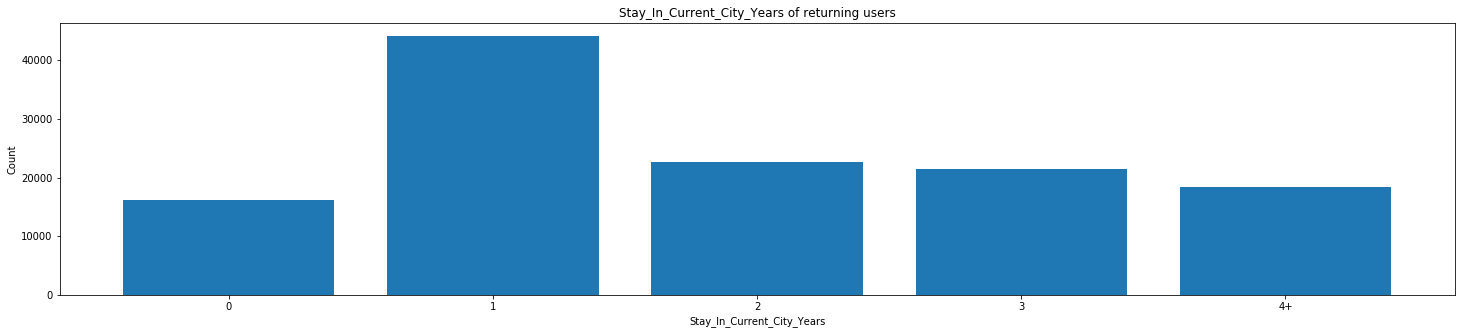

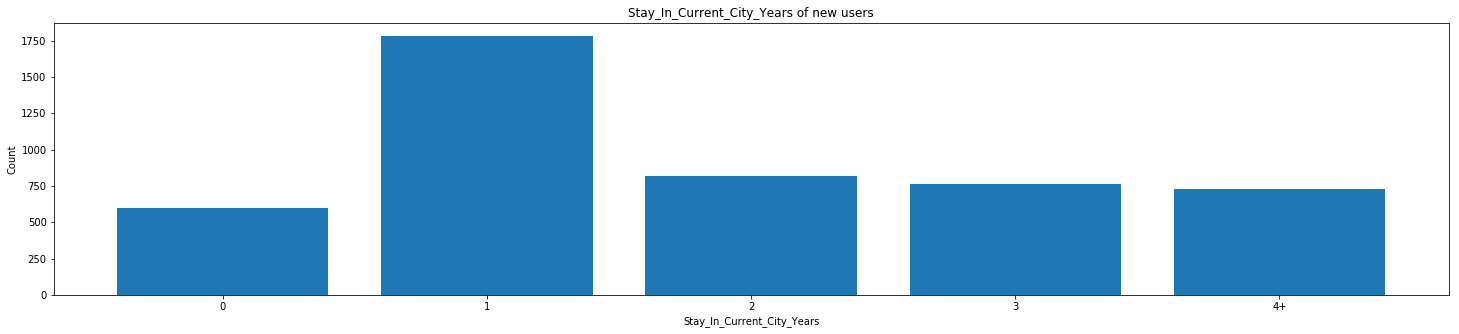

In [110]:
#Let us understand how the number of stay in a city of returning users affects sales
plt.bar(returning_users_City_Stay_In_Current_City_Years['Stay_In_Current_City_Years'],returning_users_City_Stay_In_Current_City_Years['count'])
plt.title('Stay_In_Current_City_Years of returning users')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
fig_size[0]= 25
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
#for i, v in enumerate(returning_users_Age['count']):
   # plt.text(v + 3, i + 0.25, str(v), color='blue', fontweight='bold')
plt.show()

#Let us understand how the number of stay in a city of new users affects sales
plt.bar(new_users_City_Stay_In_Current_City_Years['Stay_In_Current_City_Years'],new_users_City_Stay_In_Current_City_Years['count'])
plt.title('Stay_In_Current_City_Years of new users')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
fig_size[0]= 25
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
#for i, v in enumerate(returning_users_Age['count']):
   # plt.text(v + 3, i + 0.25, str(v), color='blue', fontweight='bold')
plt.show()

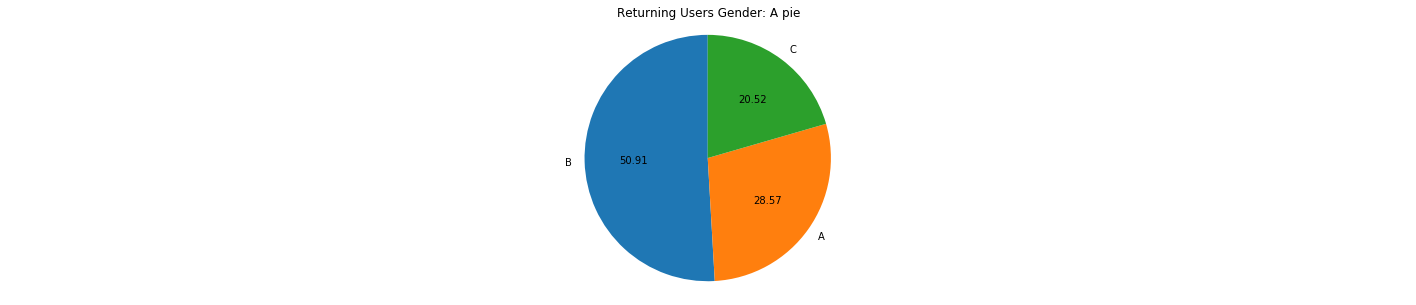

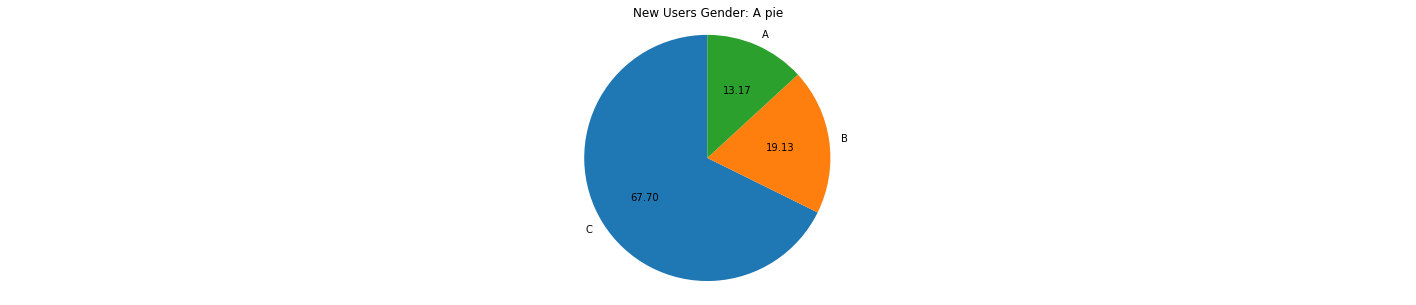

In [111]:
#let us see how city affects sales of returning users
pieLabels=returning_users_City_Category['City_Category']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_City_Category['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Gender: A pie")

plt.show()


#let us see how city affects sales of new users
pieLabels=new_users_City_Category['City_Category']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_City_Category['count'],

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Gender: A pie")

plt.show()

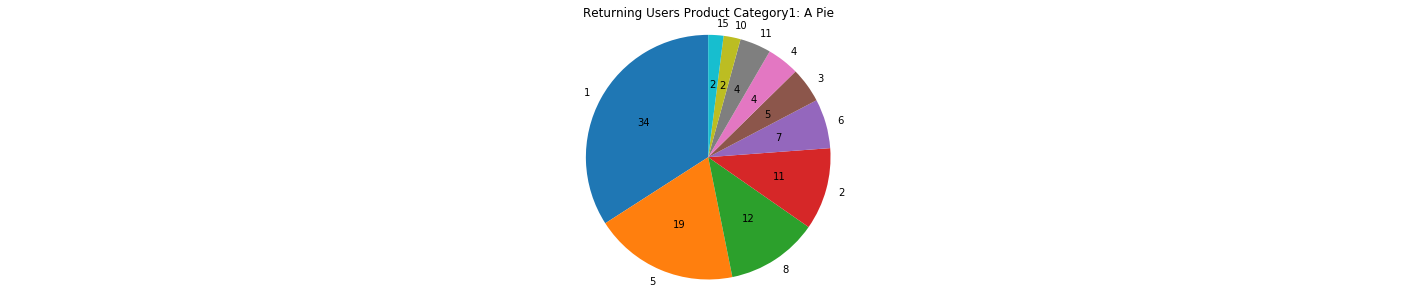

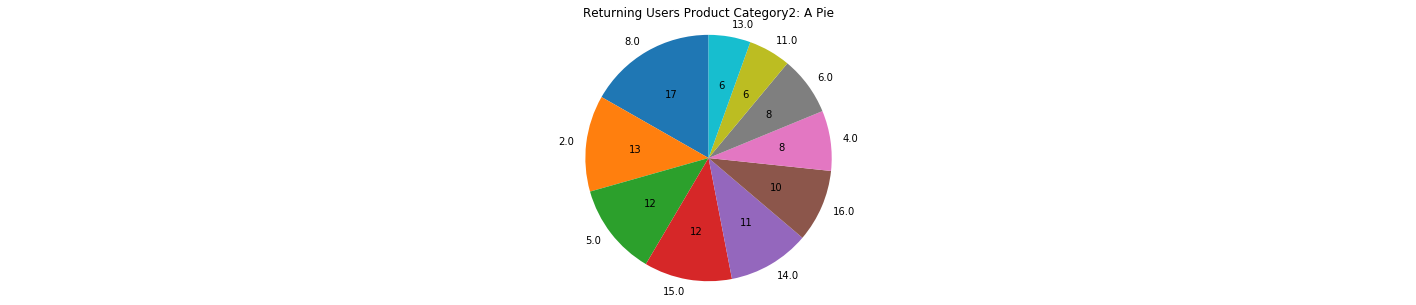

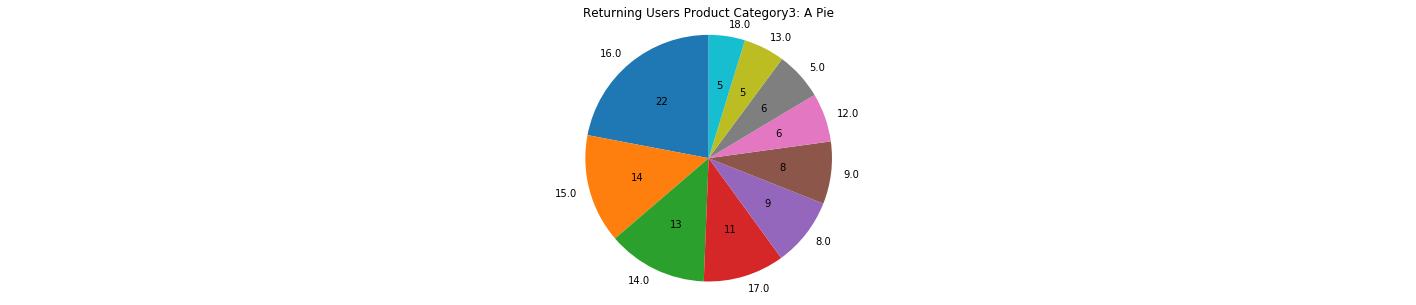

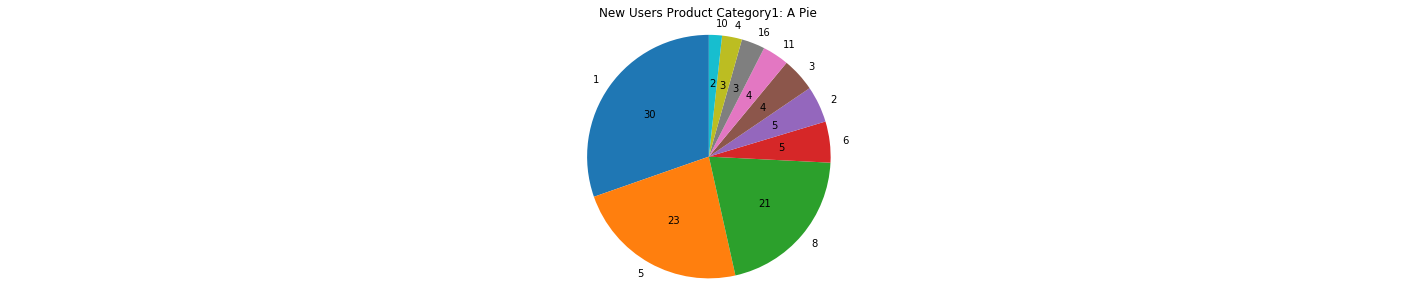

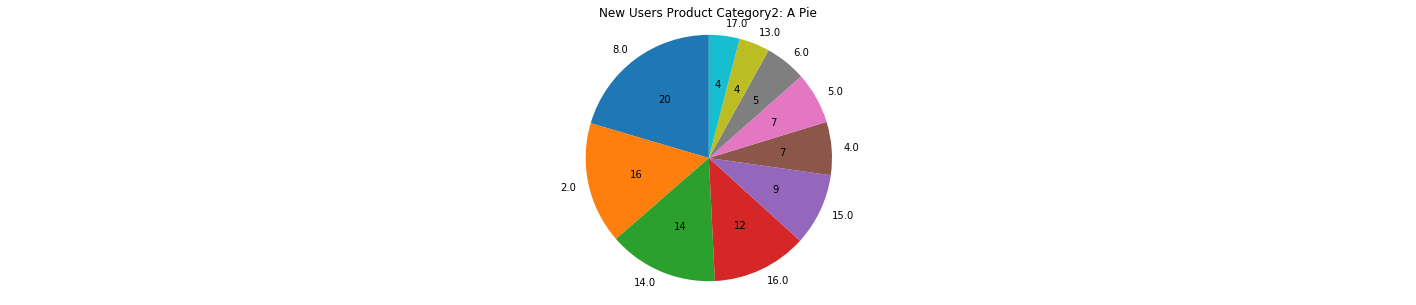

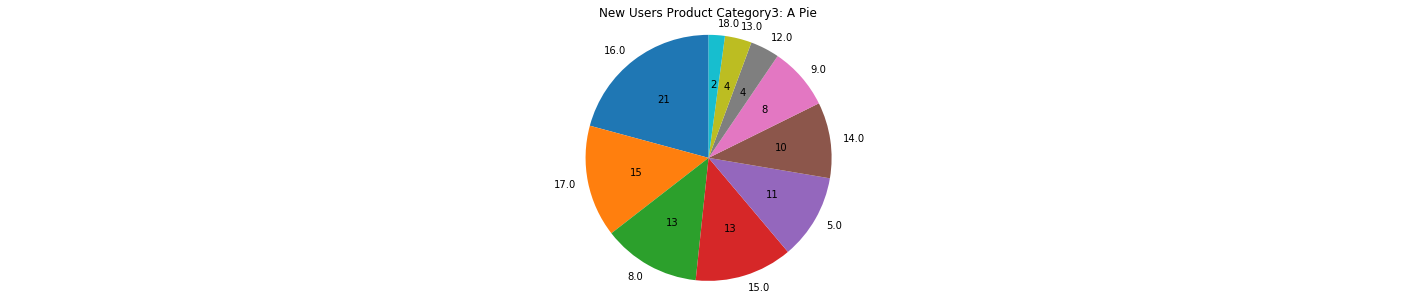

In [112]:
# let us find out which product category was a hit with return users
returning_users_Product_Category_1 = returning_users_Product_Category_1.head(10)
pieLabels=returning_users_Product_Category_1['Product_Category_1']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Product_Category_1['count'],

        labels=pieLabels,

        autopct='%1.0f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Product Category1: A Pie")
plt.show()

top_100_unique_returning_users_PC1 = top_100_unique_returning_users.loc[top_100_unique_returning_users['Product_Category_1'] == 1]
#print(top_100_unique_returning_users_PC1.Product_Category_2.unique())
d = {'Product_Category_1': [1,1,1,1,1,1,1,1,1,1,1,1,1,1], 'Unique_Sub_Categories': top_100_unique_returning_users_PC1.Product_Category_2.unique()}

df = pd.DataFrame(data=d)
#print(df)


returning_users_Product_Category_2 = returning_users_Product_Category_2.head(10)
pieLabels=returning_users_Product_Category_2['Product_Category_2']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Product_Category_2['count'],

        labels=pieLabels,

        autopct='%1.0f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Product Category2: A Pie")
plt.show()

top_100_unique_returning_users_PC2 = top_100_unique_returning_users.loc[top_100_unique_returning_users['Product_Category_2'] == 8]
#print(top_100_unique_returning_users_PC2.Product_Category_3.unique())

d2 = {'Product_Category_2': [8,8,8,8,8,8,8,8,8,8], 'Unique_Sub_Categories': top_100_unique_returning_users_PC2.Product_Category_3.unique()}

df2 = pd.DataFrame(data=d2)
#print(df2)


returning_users_Product_Category_3 = returning_users_Product_Category_3.head(10)
pieLabels=returning_users_Product_Category_3['Product_Category_3']
figureObject, axesObject = plt.subplots()
axesObject.pie(returning_users_Product_Category_3['count'],

        labels=pieLabels,

        autopct='%1.0f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("Returning Users Product Category3: A Pie")
plt.show()

#Category 1 and 5 have done really well in our Category_1 group
#Category 


# let us find out which product category was a hit with new users
new_users_Product_Category_1 = new_users_Product_Category_1.head(10)
pieLabels=new_users_Product_Category_1['Product_Category_1']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_Product_Category_1['count'],
        labels=pieLabels,
        autopct='%1.0f',
        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Product Category1: A Pie")
plt.show()



new_users_Product_Category_2 = new_users_Product_Category_2.head(10)
pieLabels=new_users_Product_Category_2['Product_Category_2']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_Product_Category_2['count'],

        labels=pieLabels,

        autopct='%1.0f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Product Category2: A Pie")
plt.show()



new_users_Product_Category_3 = new_users_Product_Category_3.head(10)
pieLabels=new_users_Product_Category_3['Product_Category_3']
figureObject, axesObject = plt.subplots()
axesObject.pie(new_users_Product_Category_3['count'],

        labels=pieLabels,

        autopct='%1.0f',

        startangle=90)
axesObject.axis('equal')
axesObject.set_title("New Users Product Category3: A Pie")
plt.show()

#Category 1 and 5 have done really well in our Category_1 group
#Category 

Conclusion:

